In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Vamos analisar vinhos!

Usaremos um dataset composto por propriedades físico-químicas de vinhos brancos. Temos 1599 amostras e um total de 11 variáveis independentes, descritas abaixo:

 - `fixed acidity`: a maioria dos ácidos envolvidos com vinho (não evaporam prontamente) 
 - `volatile acidity`: a quantidade de ácido acético no vinho, que em níveis muito altos pode levar a um gosto desagradável de vinagre
 - `citric acid`: encontrado em pequenas quantidades, o ácido cítrico pode adicionar "leveza" e sabor aos vinhos
 - `residual sugar`: a quantidade de açúcar restante após a fermentação é interrompida, é raro encontrar vinhos com menos de 1 grama / litro e vinhos com mais de 45 gramas / litro são considerados doces
 - `chlorides`: a quantidade de sal no vinho
free sulfur dioxide: a forma livre de SO2 existe em equilíbrio entre o SO2 molecular (como gás dissolvido) e o íon bissulfito; impede o crescimento microbiano e a oxidação do vinho
 - `total sulfur dioxide`: Quantidade de formas livres e encadernadas de S02; em baixas concentrações, o SO2 é quase indetectável no vinho, mas nas concentrações de SO2 acima de 50 ppm, o SO2 se torna evidente no nariz e no sabor do vinho.
 - `density`: a densidade do vinho é próxima a da água, dependendo do percentual de álcool e teor de açúcar
 - `pH`: descreve se o vinho é ácido ou básico numa escala de 0 (muito ácido) a 14 (muito básico); a maioria dos vinhos está entre 3-4 na escala de pH
 - `sulphates`: um aditivo de vinho que pode contribuir para os níveis de gás de dióxido de enxofre (S02), que age como um antimicrobiano e antioxidante
 - `alcohol`: o percentual de álcool no vinho


Existe ainda uma variável chamada `quality`. Essa variável é uma nota de qualidade do vinho que varia de 0 a 10.

Nesse caso, todas as colunas, exceto a coluna "quality", são consideradas variáveis contínuas, pois representam medidas numéricas contínuas. A coluna "quality" é considerada uma variável categórica, pois representa as categorias de qualidade do vinho (pontuações de 0 a 10).

In [2]:
wine = pd.read_csv('E:\INFNET\PROJETO\INFNET\logisticregression\winequalityN.csv', index_col= False)

In [3]:
wine

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
wine.isnull().sum().sort_values( ascending= False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
residual sugar           2
chlorides                2
type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
dtype: int64

defini que todos os vinhos acima de 5 são bons , logo = 1 e os abaixo ou igual a 5 são ruins  = 0

In [6]:
number_of_wines = wine.shape[0]
wine['category'] =  np.zeros((number_of_wines, 1))
wine.loc[wine.quality > 5, "category"] = 1

In [7]:
wine

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  category  
0          0.45      8.8        6       1.0  
1          0.49      9.5        6       1.0  
2          0.44     10.1        6       1.0  
3          0.40      9.9        6       1.0  
4          0.40      9.9        6       1.0  
...         ...      ...      ...       ...  
6492       0.58     10.5        5       0.0  
6493        NaN     11.2        6       1.0  
6494       0.75     11.0        6       1.0  
6495       0.71     10.2        5       0.0  
6496       0.66     11.0        6       1.0  

[6497 rows x 14 columns]

In [8]:
w_wine = wine['type'] == 'white'
r_wine = wine['type'] == 'red'

<Axes: title={'center': 'Qualidade vinho tinto'}>

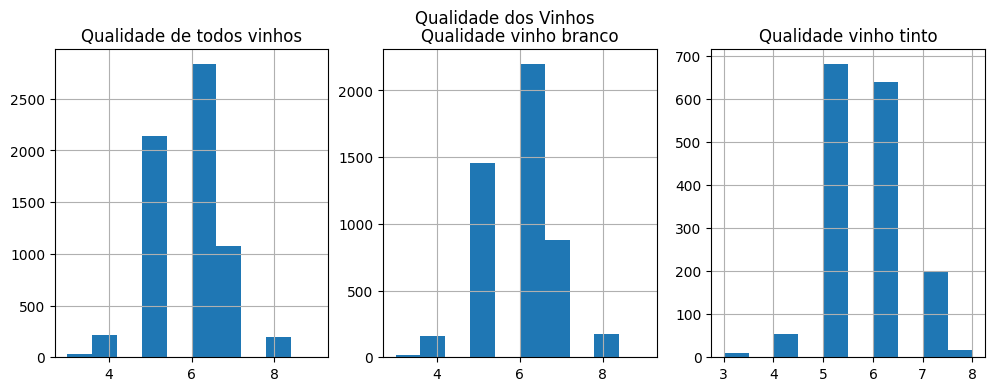

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

fig.suptitle("Qualidade dos Vinhos")
axes[0].set_title("Qualidade de todos vinhos")
axes[1].set_title("Qualidade vinho branco")
axes[2].set_title("Qualidade vinho tinto")
wine.quality.hist(ax=axes[0])

wine[w_wine].quality.hist(ax=axes[1])

wine[r_wine].quality.hist(ax=axes[2])



In [10]:
df_w_wine = wine[w_wine]
df_r_wine = wine[r_wine]


In [11]:
df_w_wine.isnull().sum().sort_values( ascending= False)

fixed acidity           8
volatile acidity        7
pH                      7
citric acid             2
residual sugar          2
chlorides               2
sulphates               2
type                    0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
alcohol                 0
quality                 0
category                0
dtype: int64

In [12]:
df_r_wine.isnull().sum().sort_values( ascending= False)

fixed acidity           2
pH                      2
sulphates               2
volatile acidity        1
citric acid             1
type                    0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
alcohol                 0
quality                 0
category                0
dtype: int64

para poder alterar de forma simplificada o gráfico da correlação, irei criar uma váriável com os nomes das colunas


In [13]:
vars = [
   'fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol',
   'category'
]

Vou criar uma mascara para plotar somente a parte inferior do heatmap e para facilitar e não ter que repetir código, irei fazer uma função mask
com a função mask vou subplotar as correlações de todo dataframe, somente branco e somente tinto

In [14]:
def mask(DF):
    mask = np.triu(np.ones_like(DF, dtype=bool)) 
    return mask

Text(0.5, 1.0, 'VINHO TINTO')

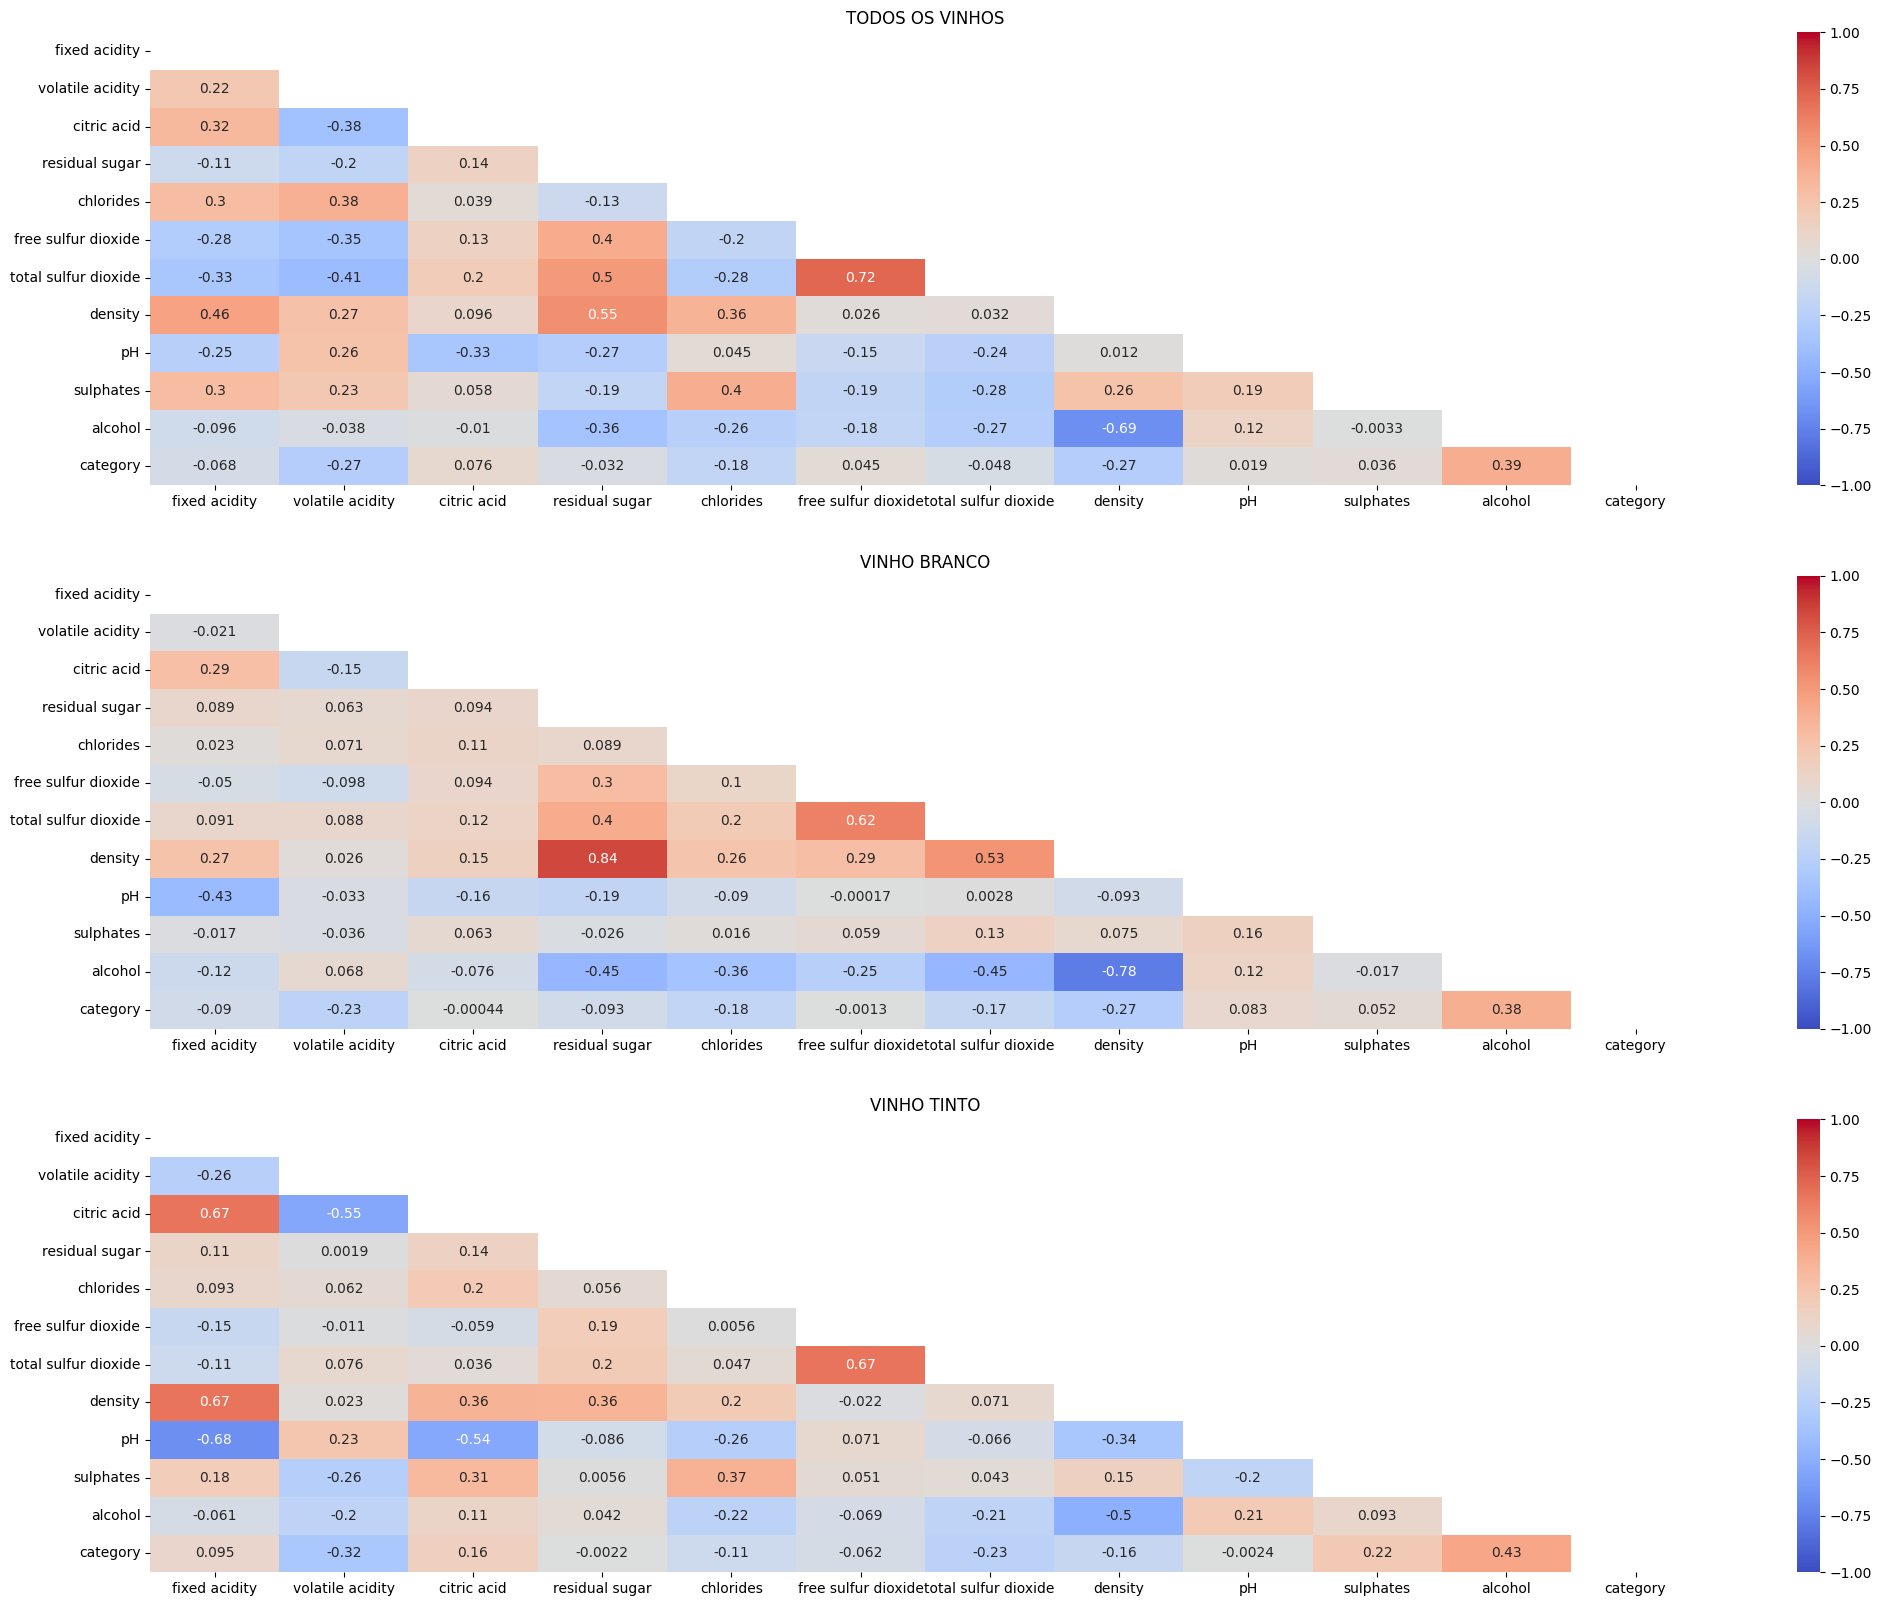

In [15]:


fig, axes = plt.subplots(3, 1, figsize=(25, 20))
sns.heatmap(wine[vars].corr(), vmax=1, vmin=-1, annot=True, ax=axes[0], cmap="coolwarm", mask= mask(wine[vars].corr()))
sns.heatmap(df_w_wine[vars].corr(), vmax=1, vmin=-1, annot=True, ax=axes[1], cmap="coolwarm", mask= mask(df_w_wine[vars].corr()))
sns.heatmap(df_r_wine[vars].corr(), vmax=1, vmin=-1, annot=True, ax=axes[2], cmap="coolwarm", mask= mask(df_r_wine[vars].corr()))

axes[0].set_title("TODOS OS VINHOS")
axes[1].set_title("VINHO BRANCO")
axes[2].set_title("VINHO TINTO")

Com os graficos acima, ficou claro que nenhuma das colunas tem uma correlação forte com a minha categoria
Logo os valores nulos não irão influenciar de forma drástica 

In [16]:
wine_t = wine.fillna(wine.mean())

C:\Users\Diones\AppData\Local\Temp\ipykernel_1716\691893756.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine_t = wine.fillna(wine.mean())


In [17]:
df_tr_wine= df_r_wine.fillna(df_r_wine.mean())

C:\Users\Diones\AppData\Local\Temp\ipykernel_1716\2938092119.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_tr_wine= df_r_wine.fillna(df_r_wine.mean())


In [18]:
df_tw_wine = df_w_wine.fillna(df_w_wine.mean())

C:\Users\Diones\AppData\Local\Temp\ipykernel_1716\1451453130.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_tw_wine = df_w_wine.fillna(df_w_wine.mean())


agora gerando a correlação com os datasets tratados para comparar e conferir se algo mudou nas correlações


Text(0.5, 1.0, 'VINHO TINTO')

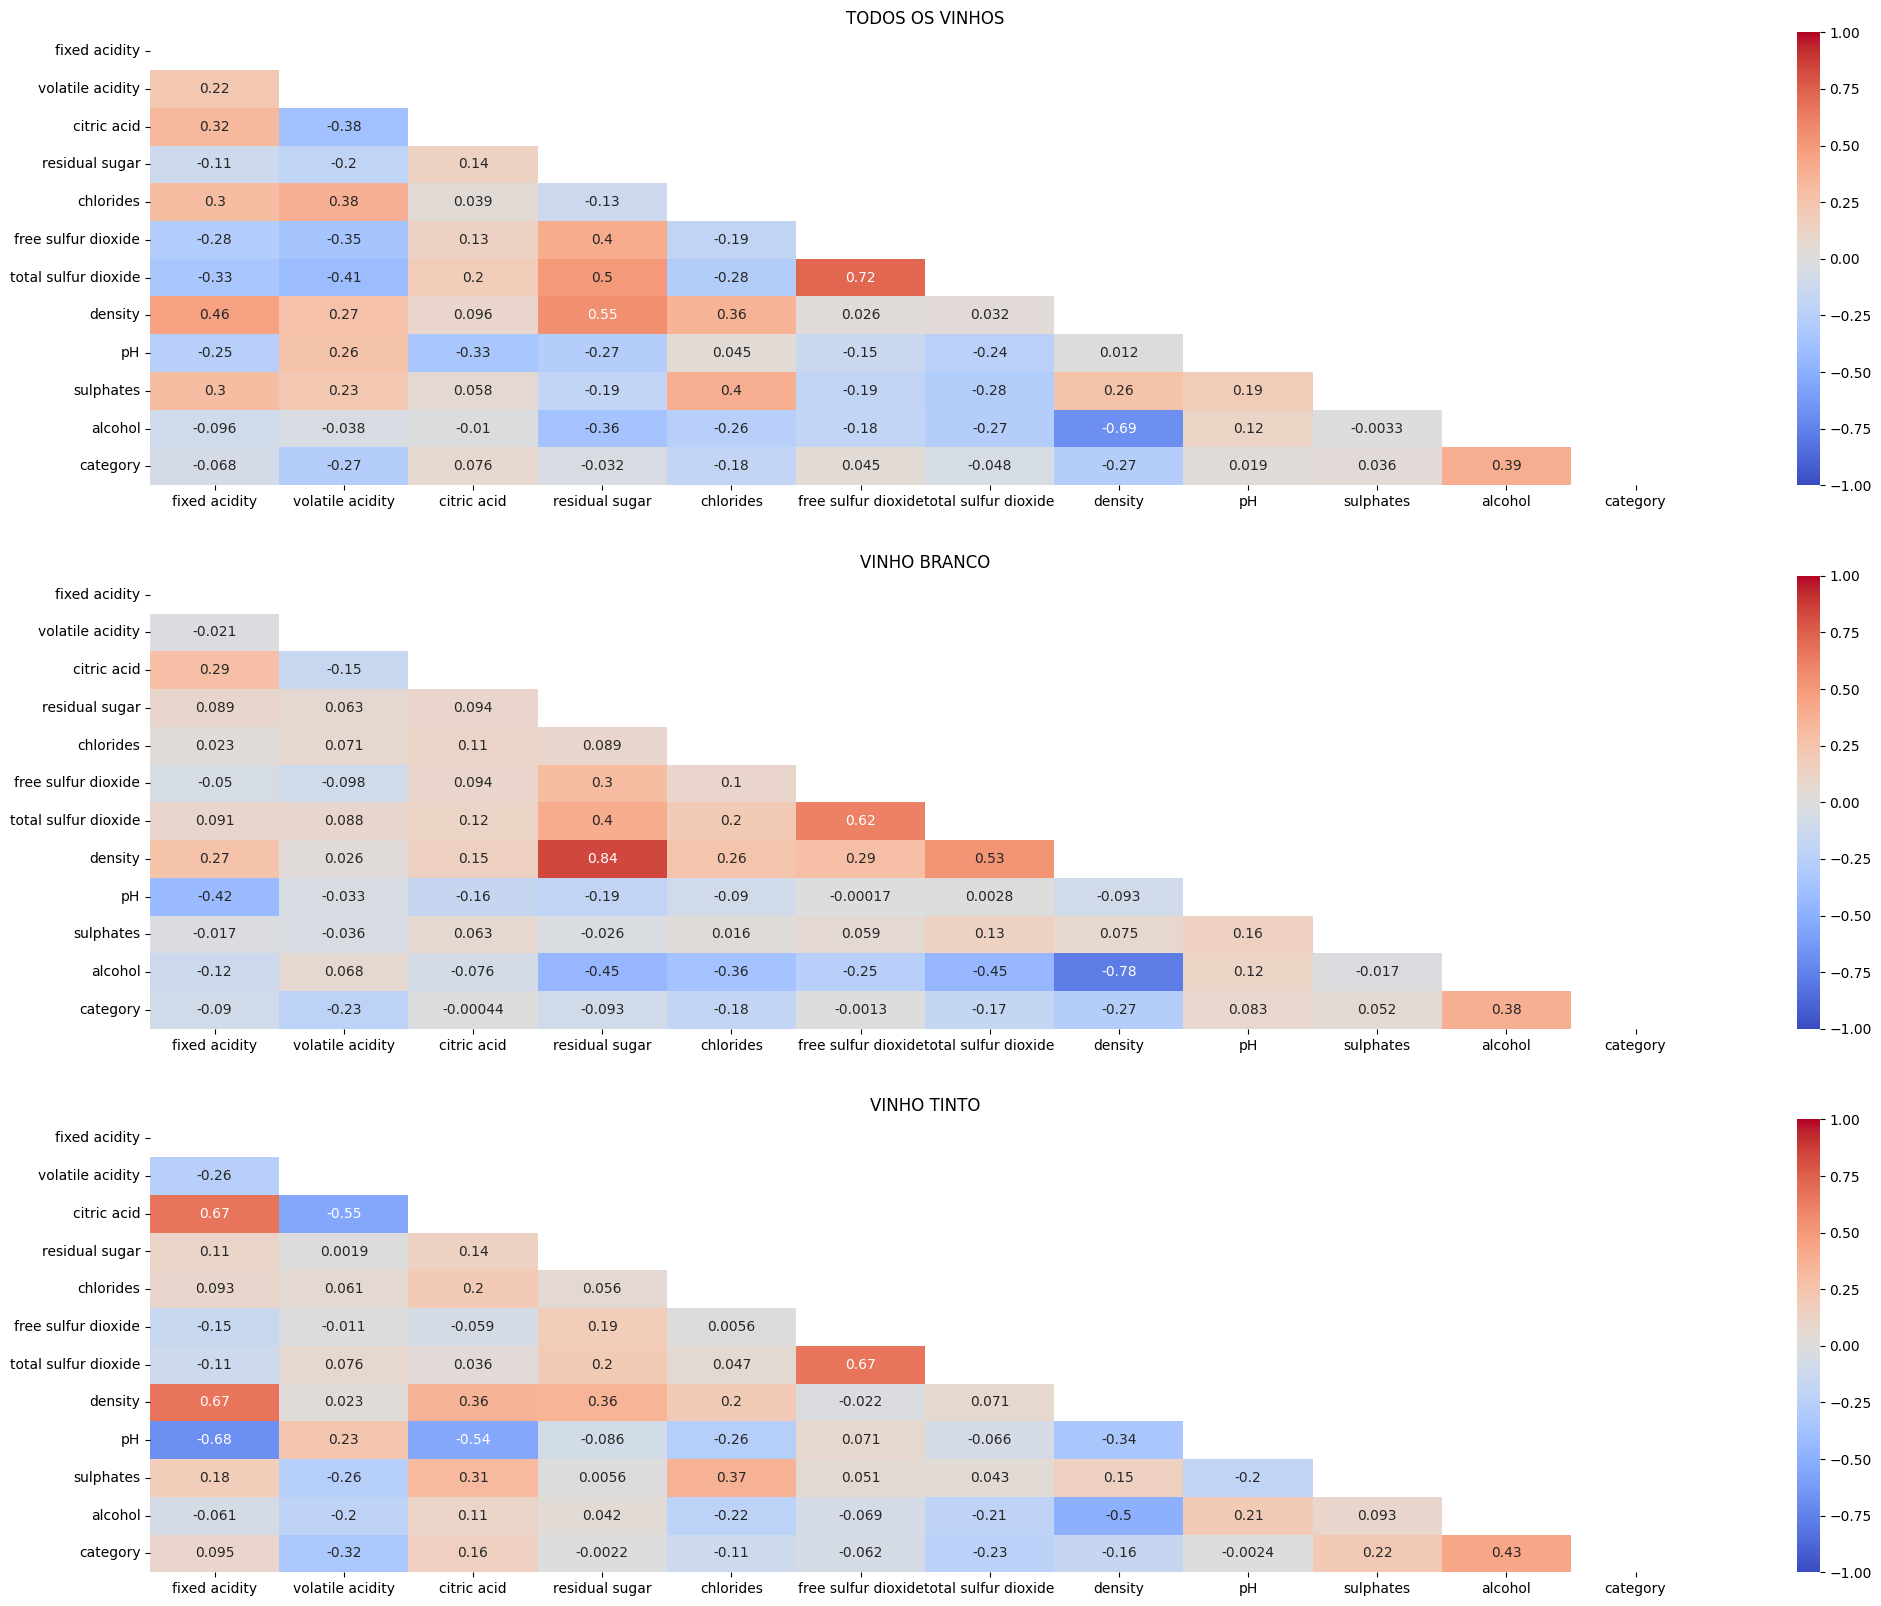

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(25, 20))
sns.heatmap(wine_t[vars].corr(), vmax=1, vmin=-1, annot=True, ax=axes[0], cmap="coolwarm", mask= mask(wine_t[vars].corr()))
sns.heatmap(df_tw_wine[vars].corr(), vmax=1, vmin=-1, annot=True, ax=axes[1], cmap="coolwarm", mask= mask(df_tw_wine[vars].corr()))
sns.heatmap(df_tr_wine[vars].corr(), vmax=1, vmin=-1, annot=True, ax=axes[2], cmap="coolwarm", mask= mask(df_tr_wine[vars].corr()))

axes[0].set_title("TODOS OS VINHOS")
axes[1].set_title("VINHO BRANCO")
axes[2].set_title("VINHO TINTO")

como pode ser visto , mantiveram as correlações, assim como usarei os dados de regressão logistica para classificar os vinhos, esses valores médios encontrados não causarão muitos desvios.

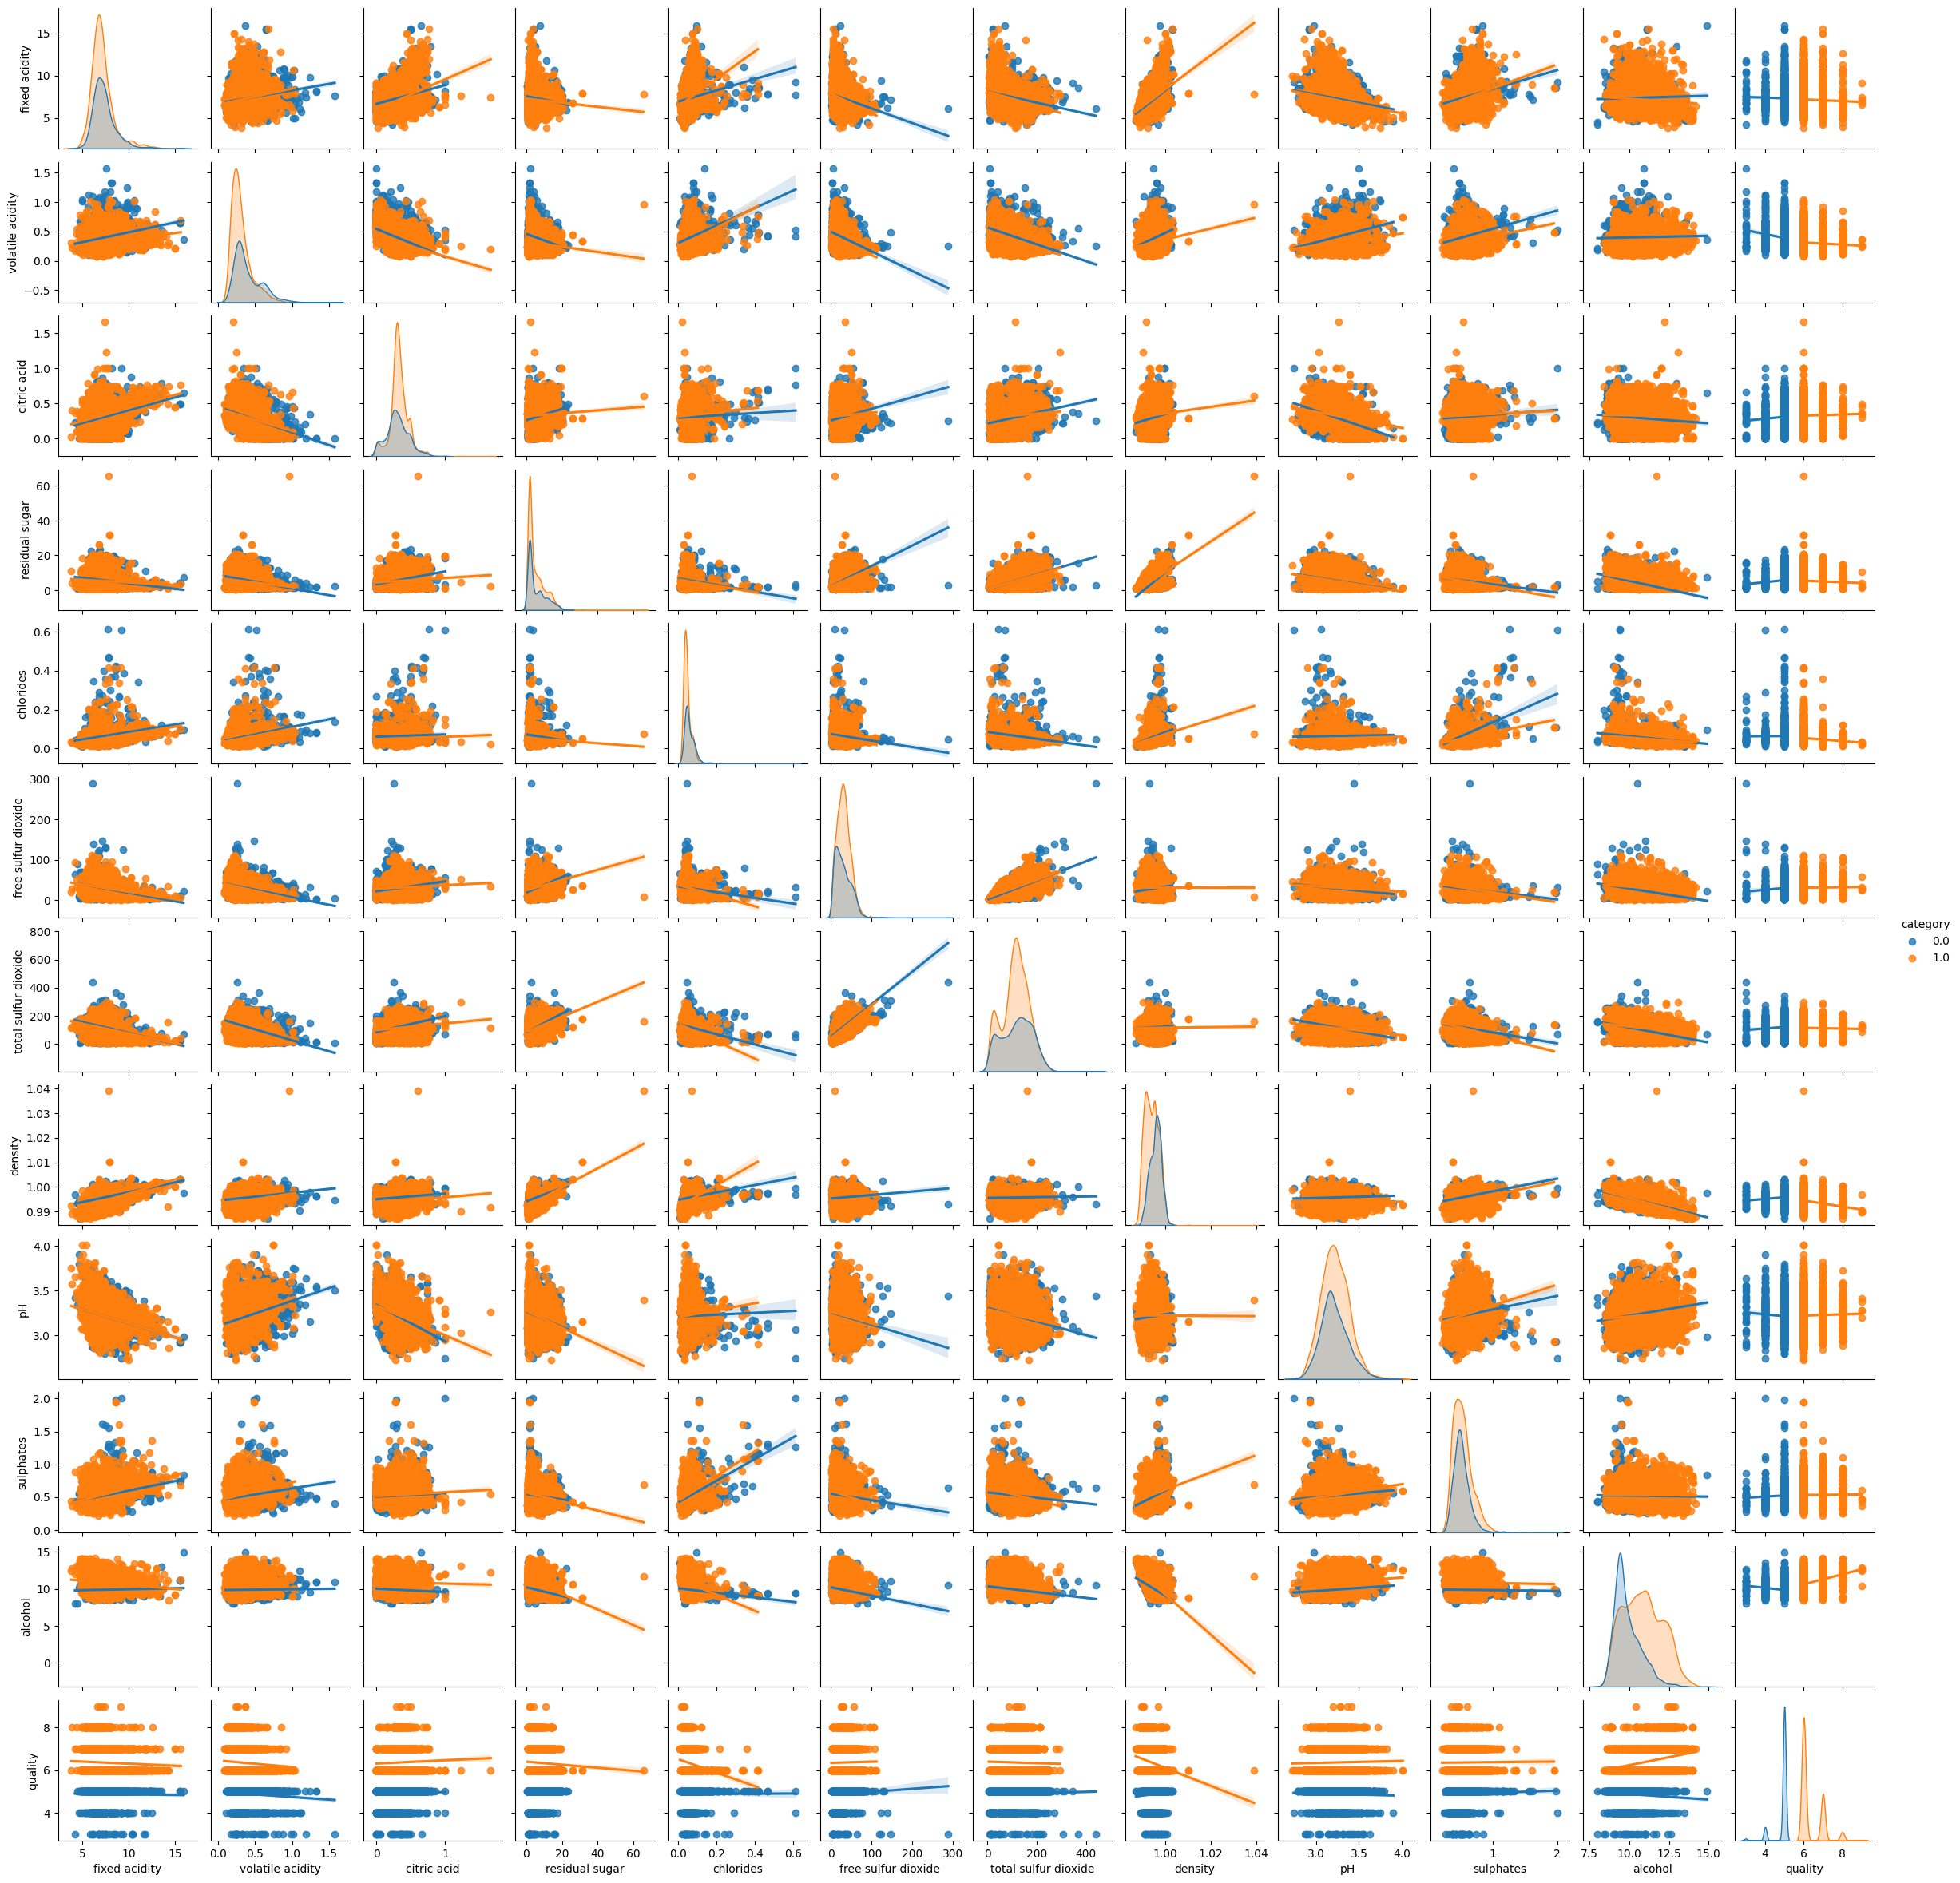

In [20]:
#fazendo um pairplot

vars = [
    'fixed acidity', 
    'volatile acidity', 
    'citric acid', 
    'residual sugar',
    'chlorides', 
    'free sulfur dioxide', 
    'total sulfur dioxide', 
    'density',
    'pH', 
    'sulphates', 
    'alcohol', 
    'quality',
    'category'
]
sns.pairplot(wine_t[vars], hue = 'category', height= 2, kind="reg", )

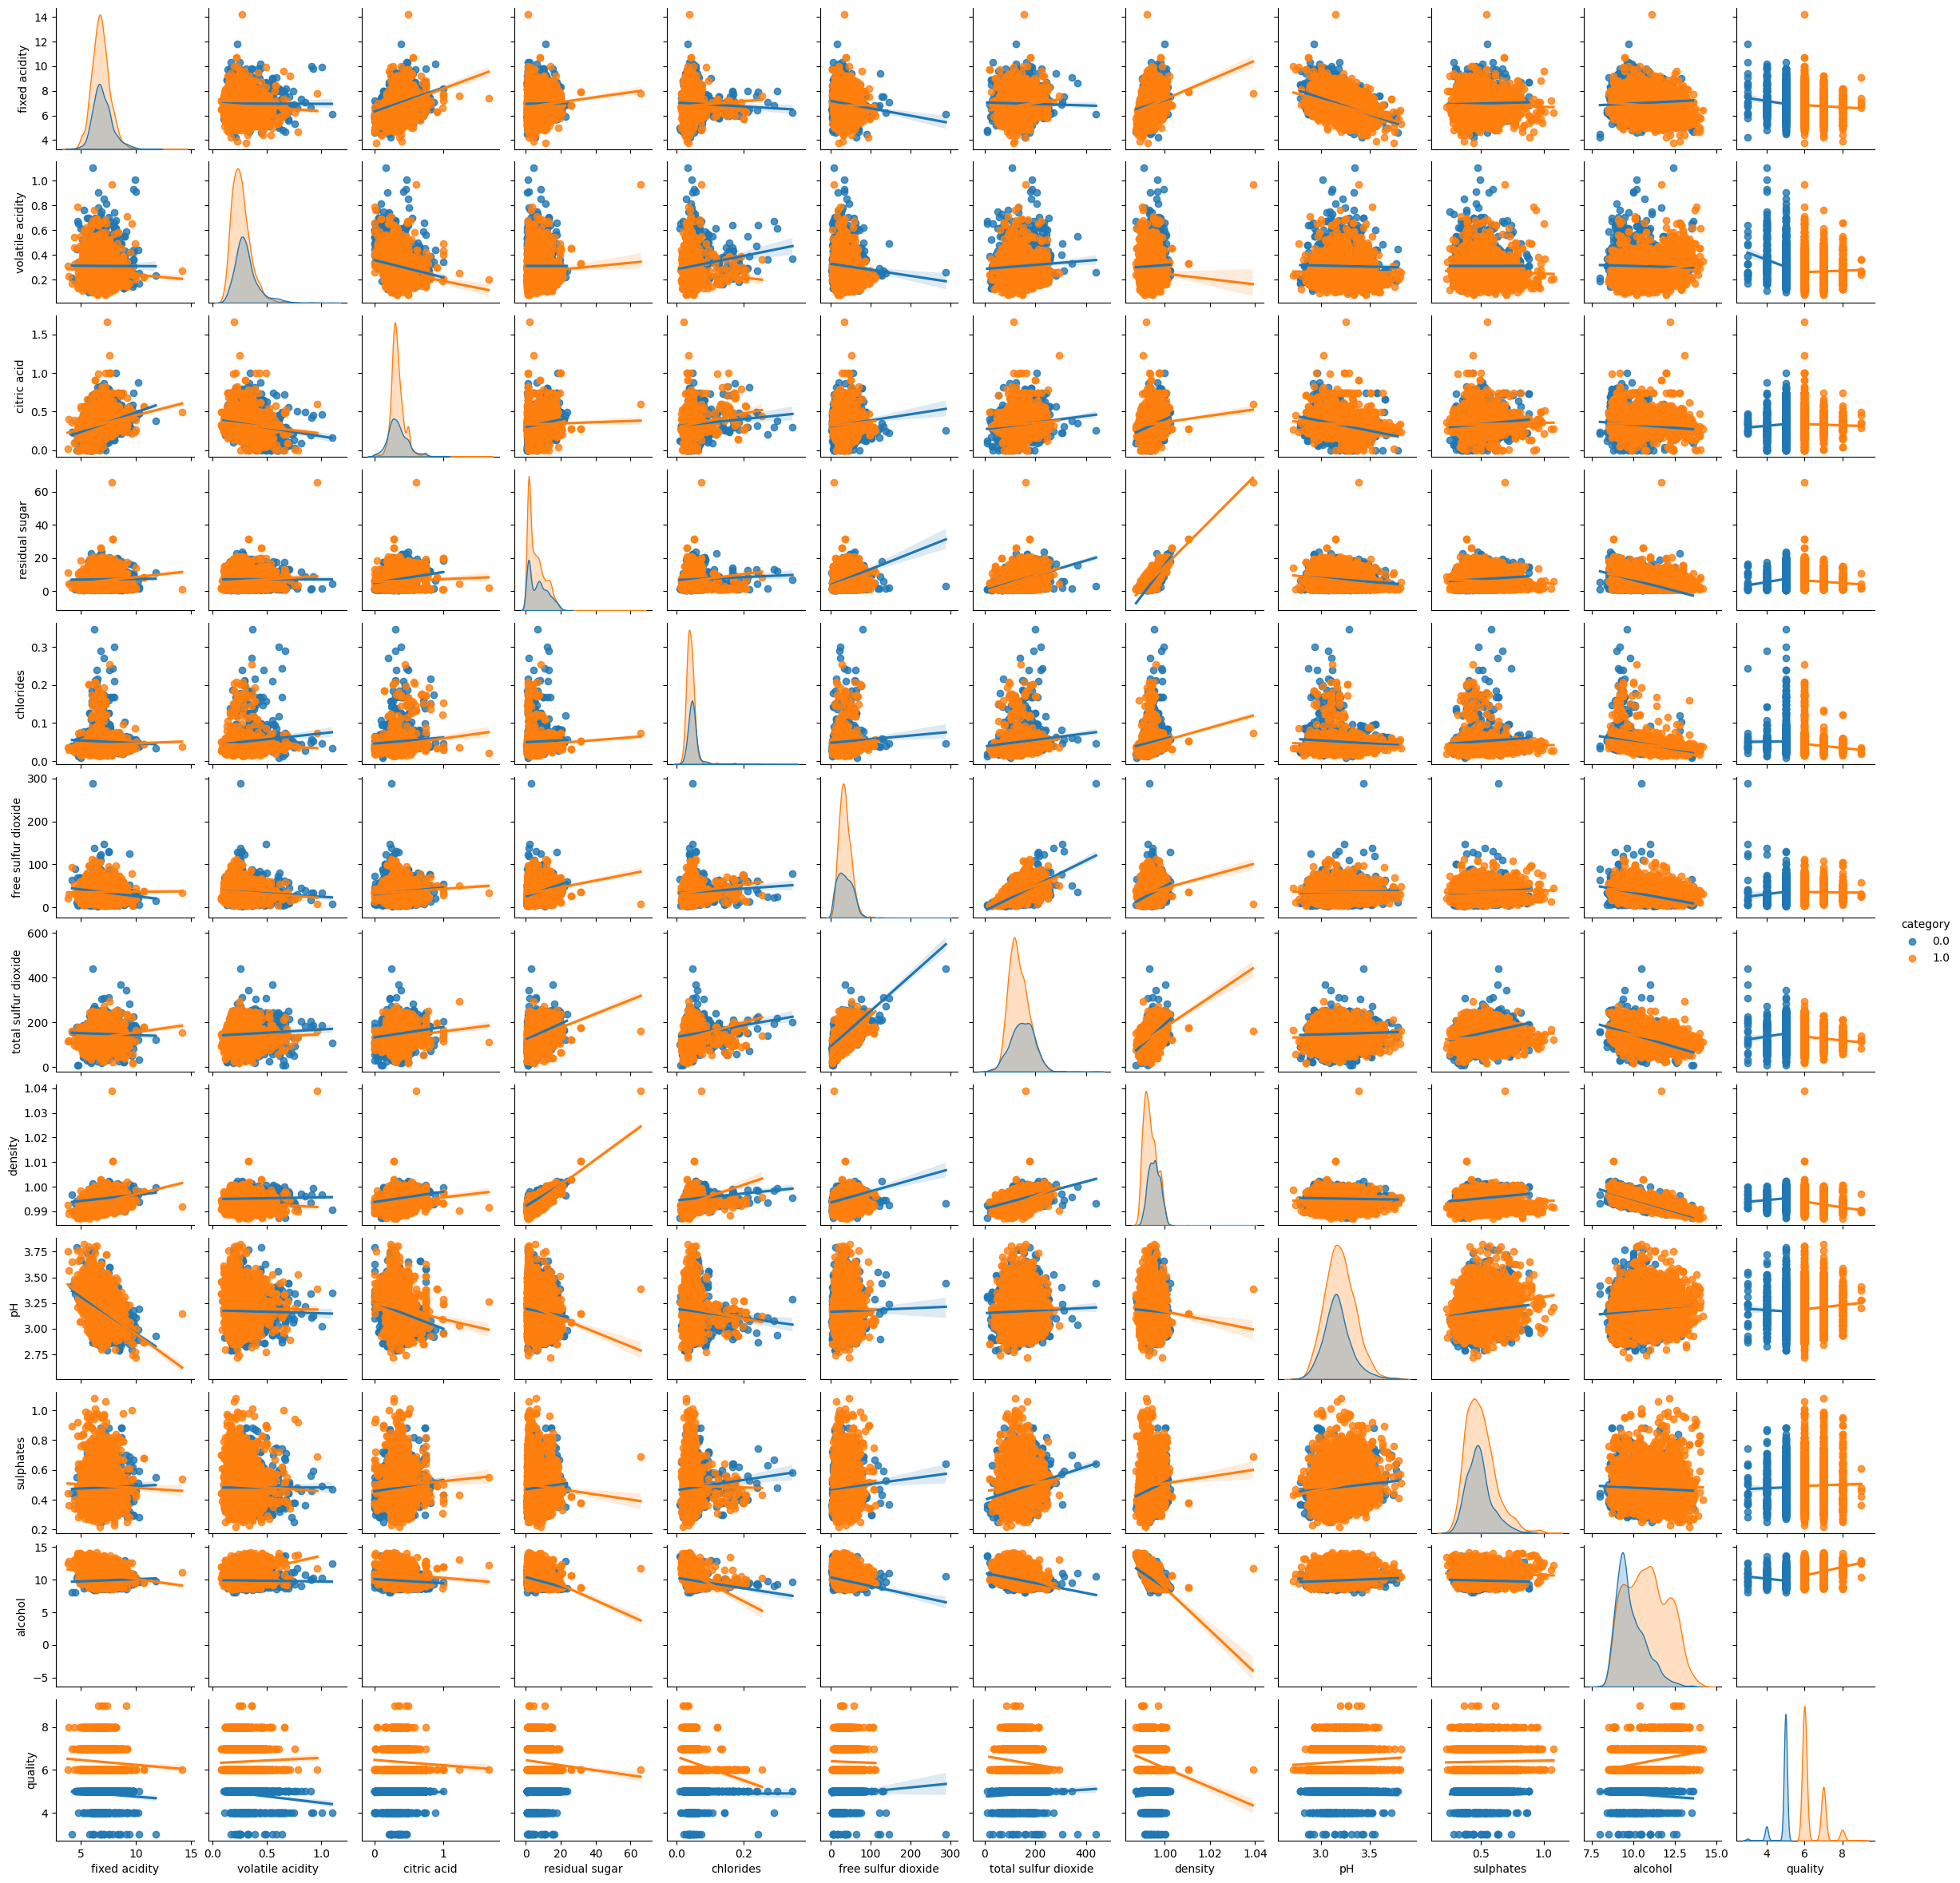

In [21]:
sns.pairplot(df_tw_wine[vars], hue = 'category', height= 2, kind="reg", )

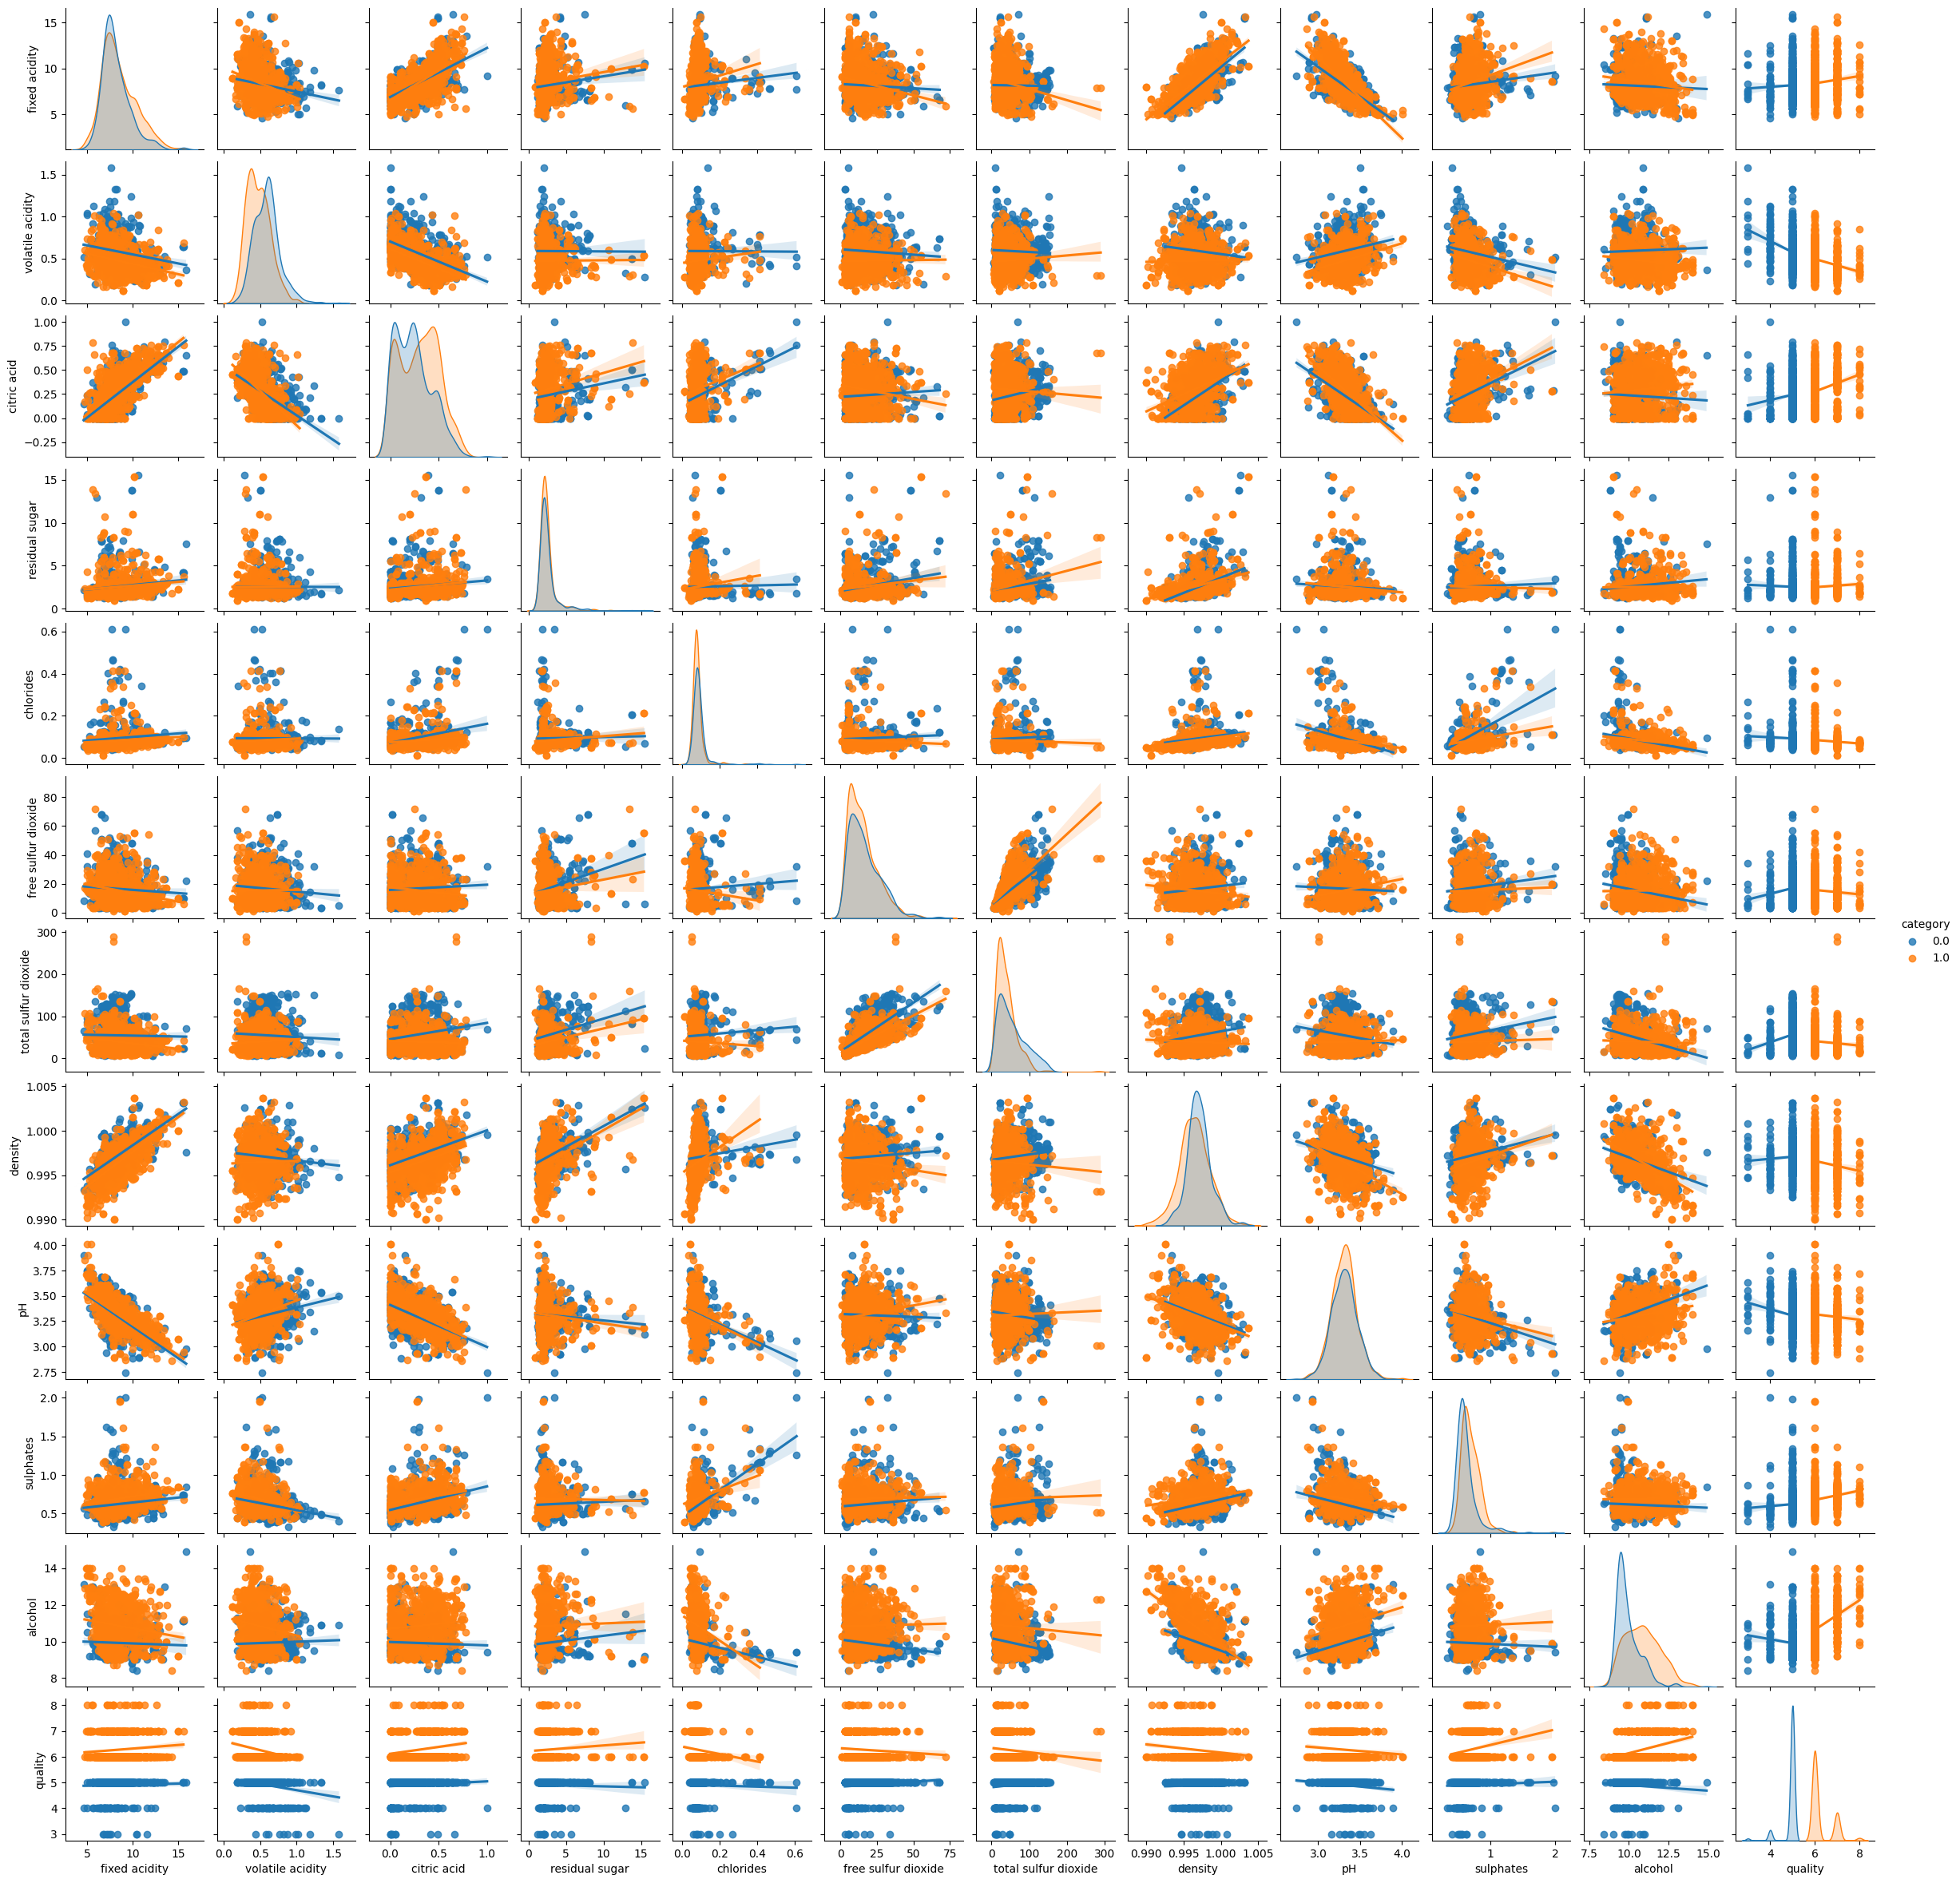

In [22]:
sns.pairplot(df_tr_wine[vars], hue = 'category', height= 2, kind="reg", )

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay,
    roc_auc_score,
    r2_score
)

farei as análises dos 3 tipos, iniciando pela análise de todos os vinhos


In [24]:
var = [
   'fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol',
]

fazer uma separação de teste e treino com 80% para treino e 20% para teste. 
usando o scaler para poder normalizar as escalas e aplica-las com o fit_transform e o transform.
resetei os index, pois estavam acompanhando a relação do df Wine 

In [25]:
df_tr_wine.reset_index(inplace= True)
df_tw_wine.reset_index(inplace= True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(wine_t[var],
                                                    wine_t['category'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=wine_t['category'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fazendo uma regressão logistica pois quero separar em grupos, de bons vinhos e vinhos não tão bons, essa separação foi colocada pela variável categoria que coloquei no começo do notebook

In [27]:
logreg = LogisticRegression(max_iter=10000)


In [28]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

calculando agora a probabilidade de ser bom ou ruim.
usamos o Xtrain_scaled,  e gerando uma tupla com o yhat com a probabilidade de ser ruim ou bom   ( 0 , 1 )

In [29]:
y_hat = logreg.predict_proba(X_train_scaled)
print(y_hat.shape)

(5197, 2)


definindo agora uma função para plotar um histograma ( displot seaborn ) para vizualizar essa separação logistica.


In [30]:
def plot_distributions(model, X, y, ax=None):
    y_hat = model.predict_proba(X)
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.distplot(y_hat[y.values == 1, 1], label="Good", ax=ax)
    ax.set_xlim([0, 1])
    sns.distplot(y_hat[y == 0, 1], label="Bad", ax=ax)
    ax.legend();
    return ax

plotando o gráfico

C:\Users\Diones\AppData\Local\Temp\ipykernel_1716\2770442922.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y.values == 1, 1], label="Good", ax=ax)
C:\Users\Diones\AppData\Local\Temp\ipykernel_1716\2770442922.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y == 0, 1], label=

<Axes: ylabel='Density'>

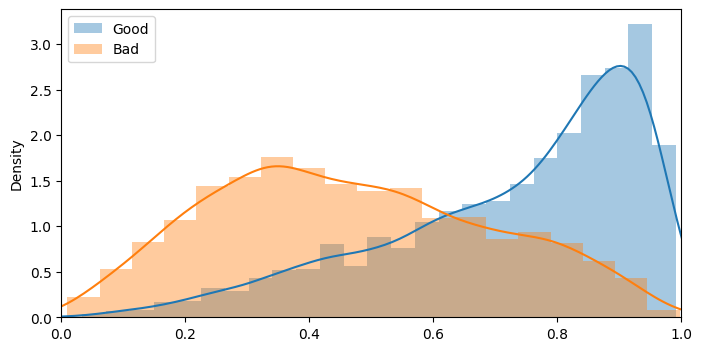

In [31]:
plot_distributions(logreg, X_train_scaled, y_train)

[Text(0, 0.5, 'Ruim (0)'), Text(0, 1.5, 'Bom (1)')]

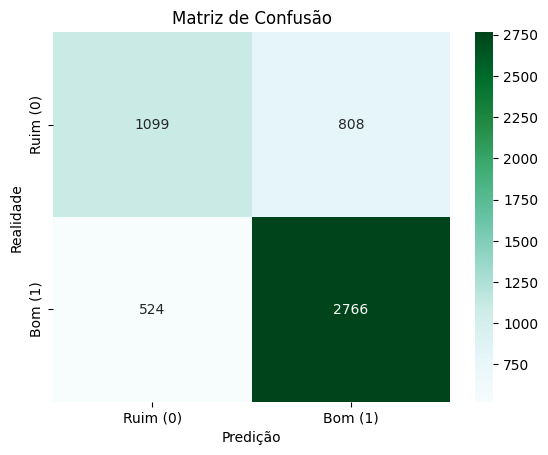

In [32]:
y_pred = logreg.predict(X_train_scaled)

cm = confusion_matrix(y_train, y_pred)

#cm = np.array([[434, 161], [1168, 516]])

ax = sns.heatmap(cm, cmap="BuGn", annot=True, fmt='g')
ax.set_xlabel("Predição")
ax.set_ylabel("Realidade")
ax.set_title("Matriz de Confusão")

ax.set_xticklabels(["Ruim (0)", "Bom (1)"])
ax.set_yticklabels(["Ruim (0)", "Bom (1)"])

In [33]:
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

print(f"A precisão é {100*  precision:.2f} %")

A precisão é 77.39 %


In [34]:
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)

print(f"A acurácia é {100 * accuracy:.2f} %")

A acurácia é 74.37 %


In [35]:
sensibility = (cm[1, 1] / (cm[1, 1] + cm[1, 0]))
print(f"A sensibilidade é {100 *  sensibility:.2f} %")

A sensibilidade é 84.07 %


In [36]:
specificity = (cm[0,0] / (cm[0, 0] + cm[0 ,1])) 

print(f"A especificidade é {100 * specificity:.2f} %")

A especificidade é 57.63 %


In [37]:
F1_score = 2 *(sensibility * precision) / (sensibility + precision)

print(f"F1 Score =  {F1_score:.2f} ")

F1 Score =  0.81 


feito os calculos na mão temos o report com os dados da métrica do scikit learn

In [38]:
print(f"A acurácia é {100 * accuracy_score(y_train, y_pred):.2f} %")
print(f"A sensibilidade é {100 *  recall_score(y_train, y_pred):.2f} %")
print(f"A precisão é {100*  precision_score(y_train, y_pred):.2f} %")
print(f"O F1 Score =  {f1_score(y_train, y_pred):.2f} ")
print(classification_report(y_train, y_pred))

A acurácia é 74.37 %
A sensibilidade é 84.07 %
A precisão é 77.39 %
O F1 Score =  0.81 
              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62      1907
         1.0       0.77      0.84      0.81      3290

    accuracy                           0.74      5197
   macro avg       0.73      0.71      0.71      5197
weighted avg       0.74      0.74      0.74      5197



temos a análise com 1 ponto de referência, agora vamos escolher qual ponto de referencia usar, esse ponto tem nome de threshold, vamos colocar de 0 a 1 dividido em 100 partes, para poder fazer essa avaliação acima para cada ponto e assim determinar o melhor
definindo a função predict que faz a comparação entre o yhat com os valores de cada threshold

In [39]:
thresholds = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

função predict para fazer as comparações yhat vs threshold

In [40]:
def predict(model, X, threshold, pos_label=1):
   y_hat = model.predict_proba(X)
   y_pred = (y_hat[:, pos_label] > threshold)
   return y_pred.astype(float)


define a função especifidade pois, as demais temos metodo no scikit learn

In [41]:
def specificity_score(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    specificity = (cm[0,0] / (cm[0, 0] + cm[0 ,1])) 
    return specificity



In [42]:
recall = []
precision = []
specificity = []
f1 = []
for threshold in thresholds:
    y_pred_thr = predict(logreg, X_train_scaled, threshold)
    recall.append(recall_score(y_train, y_pred_thr))
    precision.append(precision_score(y_train, y_pred_thr))
    specificity.append(specificity_score(y_train, y_pred_thr))
    f1.append(f1_score(y_train, y_pred_thr))

e:\miniconda3\envs\Bootcamp\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f1 máximo: 0.81 - ponto de operação: 0.42
Recall: 0.90 - Precision: 0.74


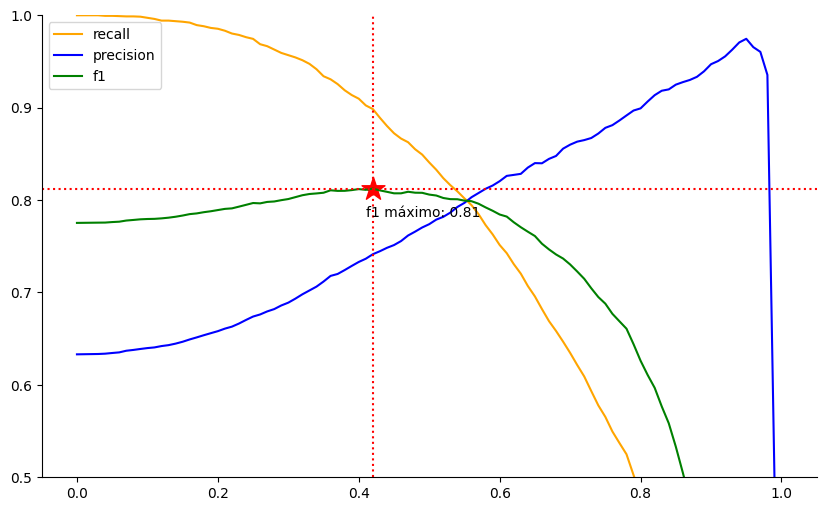

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(thresholds, recall, color="orange", label="recall")
ax.plot(thresholds, precision, color="blue", label="precision")
ax.plot(thresholds, f1, color="green", label="f1")

f1_max = max(f1)
thr_arg_max = np.argmax(f1)
thr_max = thresholds[thr_arg_max]

ax.axvline(thr_max, color="red", ls=":")
ax.axhline(f1_max, color="red", ls=":")

ax.legend()
ax.set_ylim([0.5, 1])
print(f"f1 máximo: {f1_max:.2f} - ponto de operação: {thr_max:.2f}")
print(f"Recall: {recall[thr_arg_max]:.2f} - Precision: {precision[thr_arg_max]:.2f}")

ax.scatter(x=thr_max, y=f1_max, marker = '*' , s = 300 , c = 'red')
ax.annotate(f'f1 máximo: {f1_max:.2f}', (thr_max - 0.01, f1_max - 0.03))

sns.despine()

FAZENDO A CURVA ROC

In [44]:

tpr = recall
fpr = [(1 - s) for s in specificity]
auc_score = auc(fpr, tpr)

(0.0, 1.0)

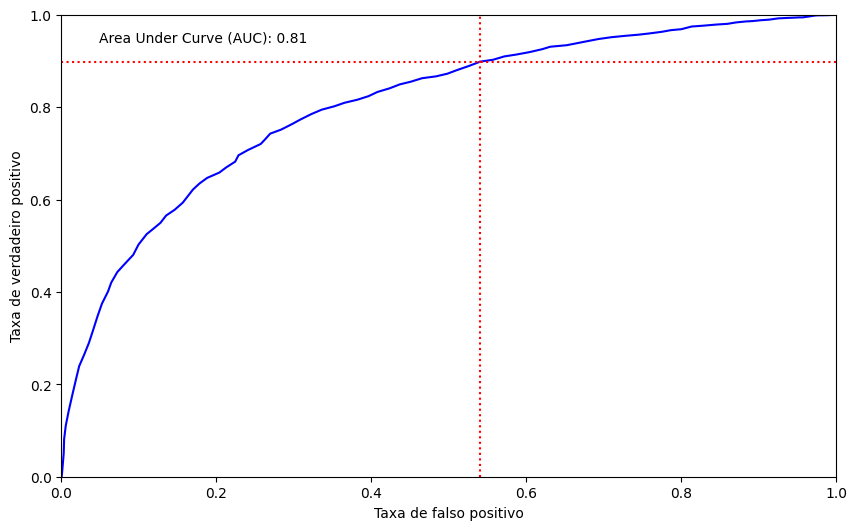

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(fpr, tpr, color="blue")
ax.set_ylabel("Taxa de verdadeiro positivo")
ax.set_xlabel("Taxa de falso positivo")

ax.axvline(fpr[thr_arg_max], color="red", ls=":")
ax.axhline(tpr[thr_arg_max], color="red", ls=":")
ax.annotate(f'Area Under Curve (AUC): {auc_score:.2f}', (tpr[thr_arg_max] - 0.85, fpr[thr_arg_max] + 0.4))
ax.set_ylim([0., 1.])
ax.set_xlim([0., 1.])

In [46]:
def get_f1_score_list(model, X, y, thresholds):
    list_of_f1 = []
    for threshold in thresholds:
        y_pred = predict(model, X, threshold)
        f1 = f1_score(y, y_pred)
        list_of_f1.append(f1)
    return list_of_f1

def get_max_f1_score(model, X, y, thresholds):
    list_of_f1 = get_f1_score_list(model, X, y, thresholds)
    f1_max = max(list_of_f1)
    f1_arg_max = np.argmax(list_of_f1)
    threshold_max = thresholds[f1_arg_max]
    return f1_max, threshold_max, f1_arg_max


fpr, tpr, thresholds = roc_curve(y_train, y_hat[:, 1], pos_label=1)
auc_score = auc(fpr, tpr)
f1_max, threshold_max, f1_arg_max =  get_max_f1_score(logreg,
                                                      X_train_scaled,
                                                      y_train,
                                                      thresholds)


print(f"Area Under Curve (AUC): {auc_score:.2f}")
print(f"Maximum F1 : {f1_max:.2f} at {threshold_max:.2f}")

Area Under Curve (AUC): 0.81
Maximum F1 : 0.81 at 0.43


In [47]:
tpr[f1_arg_max]

0.8957446808510638

C:\Users\Diones\AppData\Local\Temp\ipykernel_1716\2770442922.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y.values == 1, 1], label="Good", ax=ax)
C:\Users\Diones\AppData\Local\Temp\ipykernel_1716\2770442922.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y == 0, 1], label=

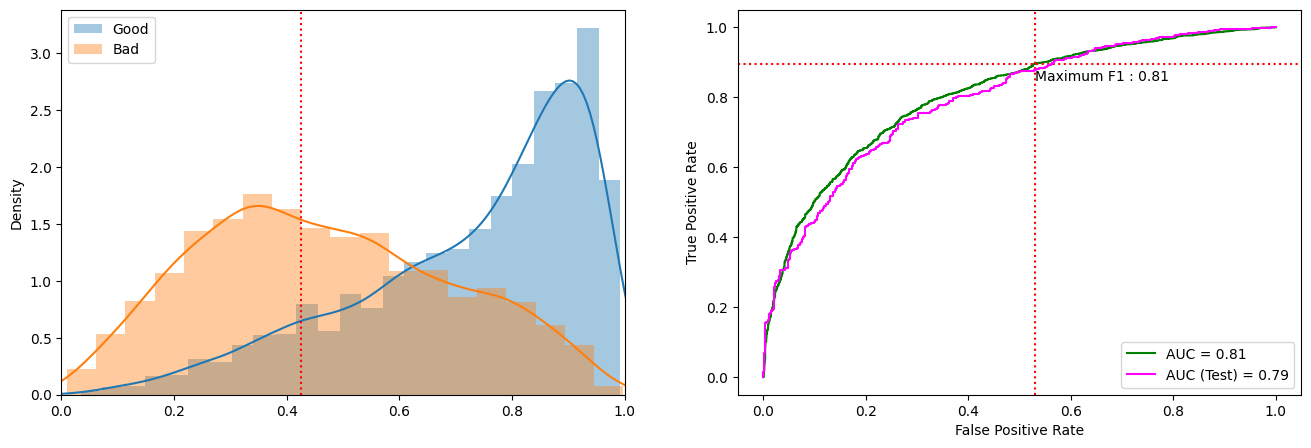

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# DISTRIBUTION
plot_distributions(logreg, X_train_scaled, y_train, ax=axes[0])
axes[0].axvline(threshold_max, color="red", ls=":")

# ROC CURVE
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score).plot(ax=axes[1],color="green")
axes[1].axvline(fpr[f1_arg_max], color="red", ls=":")
axes[1].axhline(tpr[f1_arg_max], color="red", ls=":")
axes[1].annotate(f"Maximum F1 : {f1_max:.2f}", (fpr[f1_arg_max], tpr[f1_arg_max] - 0.05))

f1_list = get_f1_score_list(logreg, X_train_scaled, y_train, thresholds)

# ROC CURVE Test
y_hat_test = logreg.predict_proba(X_test_scaled)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_test[:, 1], pos_label=1)
auc_score_test = auc(fpr_test, tpr_test)

RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=auc_score_test).plot(ax=axes[1],
                                                                         label=f"AUC (Test) = {auc_score_test:.2}",
                                                                         color="magenta")

FAZENDO AGORA AS MESMAS MEDIÇÕES PARA A BASE DE VINHOS BRANCOS

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_tw_wine[var],
                                                    df_tw_wine['category'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df_tw_wine['category'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
logreg = LogisticRegression(max_iter=10000)


In [51]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [52]:
y_hat = logreg.predict_proba(X_train_scaled)
print(y_hat.shape)

(3918, 2)


C:\Users\Diones\AppData\Local\Temp\ipykernel_1716\2770442922.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y.values == 1, 1], label="Good", ax=ax)
C:\Users\Diones\AppData\Local\Temp\ipykernel_1716\2770442922.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y == 0, 1], label=

<Axes: ylabel='Density'>

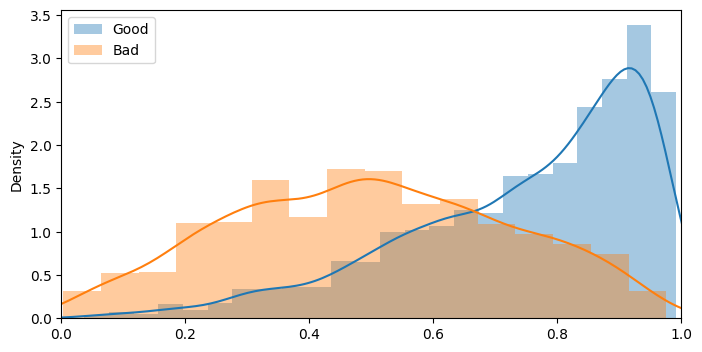

In [53]:
plot_distributions(logreg, X_train_scaled, y_train)

[Text(0, 0.5, 'Ruim (0)'), Text(0, 1.5, 'Bom (1)')]

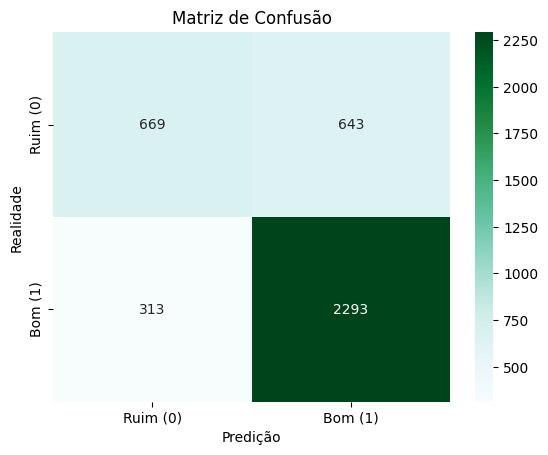

In [54]:
y_pred = logreg.predict(X_train_scaled)

cm = confusion_matrix(y_train, y_pred)

#cm = np.array([[434, 161], [1168, 516]])

ax = sns.heatmap(cm, cmap="BuGn", annot=True, fmt='g')
ax.set_xlabel("Predição")
ax.set_ylabel("Realidade")
ax.set_title("Matriz de Confusão")

ax.set_xticklabels(["Ruim (0)", "Bom (1)"])
ax.set_yticklabels(["Ruim (0)", "Bom (1)"])

In [55]:
print(f"A acurácia é {100 * accuracy_score(y_train, y_pred):.2f} %")
print(f"A sensibilidade é {100 *  recall_score(y_train, y_pred):.2f} %")
print(f"A precisão é {100*  precision_score(y_train, y_pred):.2f} %")
print(f"O F1 Score =  {f1_score(y_train, y_pred):.2f} ")
print(classification_report(y_train, y_pred))

A acurácia é 75.60 %
A sensibilidade é 87.99 %
A precisão é 78.10 %
O F1 Score =  0.83 
              precision    recall  f1-score   support

         0.0       0.68      0.51      0.58      1312
         1.0       0.78      0.88      0.83      2606

    accuracy                           0.76      3918
   macro avg       0.73      0.69      0.71      3918
weighted avg       0.75      0.76      0.75      3918



In [56]:
recall = []
precision = []
specificity = []
f1 = []
for threshold in thresholds:
    y_pred_thr = predict(logreg, X_train_scaled, threshold)
    recall.append(recall_score(y_train, y_pred_thr))
    precision.append(precision_score(y_train, y_pred_thr))
    specificity.append(specificity_score(y_train, y_pred_thr))
    f1.append(f1_score(y_train, y_pred_thr))

e:\miniconda3\envs\Bootcamp\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\miniconda3\envs\Bootcamp\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f1 máximo: 0.83 - ponto de operação: 0.46
Recall: 0.91 - Precision: 0.76


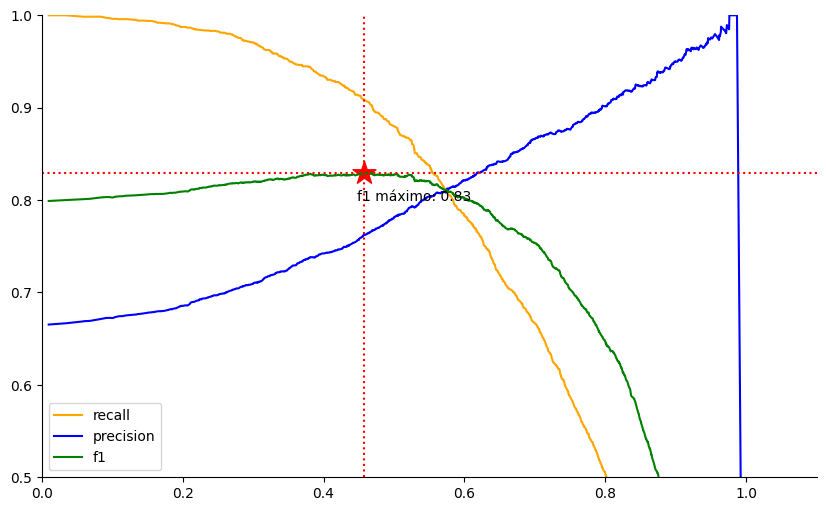

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(thresholds, recall, color="orange", label="recall")
ax.plot(thresholds, precision, color="blue", label="precision")
ax.plot(thresholds, f1, color="green", label="f1")

f1_max = max(f1)
thr_arg_max = np.argmax(f1)
thr_max = thresholds[thr_arg_max]

ax.axvline(thr_max, color="red", ls=":")
ax.axhline(f1_max, color="red", ls=":")

ax.legend()
ax.set_ylim([0.5, 1])
ax.set_xlim(0.0 , 1.1)
print(f"f1 máximo: {f1_max:.2f} - ponto de operação: {thr_max:.2f}")
print(f"Recall: {recall[thr_arg_max]:.2f} - Precision: {precision[thr_arg_max]:.2f}")

ax.scatter(x=thr_max, y=f1_max, marker = '*' , s = 300 , c = 'red')
ax.annotate(f'f1 máximo: {f1_max:.2f}', (thr_max - 0.01, f1_max - 0.03))

sns.despine()

In [58]:
tpr = recall
fpr = [(1 - s) for s in specificity]
auc_score = auc(fpr, tpr)

(0.0, 1.0)

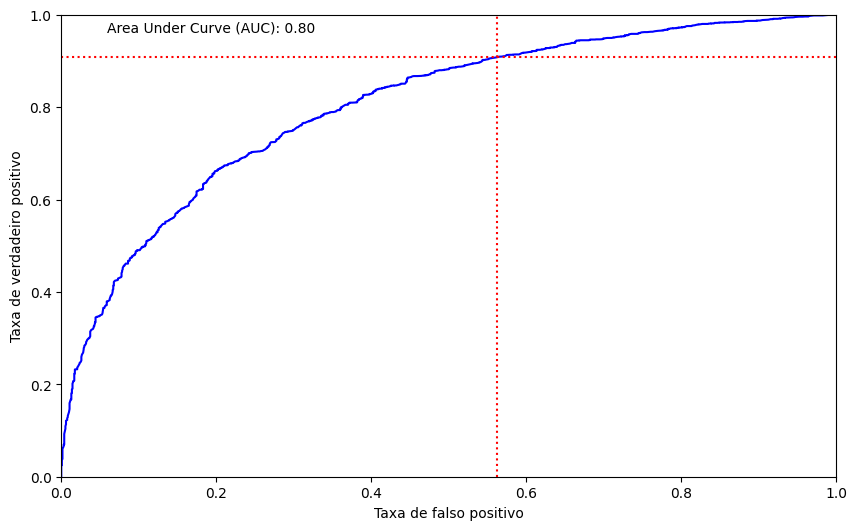

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(fpr, tpr, color="blue")
ax.set_ylabel("Taxa de verdadeiro positivo")
ax.set_xlabel("Taxa de falso positivo")

ax.axvline(fpr[thr_arg_max], color="red", ls=":")
ax.axhline(tpr[thr_arg_max], color="red", ls=":")
ax.annotate(f'Area Under Curve (AUC): {auc_score:.2f}', (tpr[thr_arg_max] - 0.85, fpr[thr_arg_max] + 0.4))
ax.set_ylim([0., 1.])
ax.set_xlim([0., 1.])

In [60]:

fpr, tpr, thresholds = roc_curve(y_train, y_hat[:, 1], pos_label=1)
auc_score = auc(fpr, tpr)
f1_max, threshold_max, f1_arg_max =  get_max_f1_score(logreg,
                                                      X_train_scaled,
                                                      y_train,
                                                      thresholds)


print(f"Area Under Curve (AUC): {auc_score:.2f}")
print(f"Maximum F1 : {f1_max:.2f} at {threshold_max:.2f}")

Area Under Curve (AUC): 0.80
Maximum F1 : 0.83 at 0.46


C:\Users\Diones\AppData\Local\Temp\ipykernel_1716\2770442922.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y.values == 1, 1], label="Good", ax=ax)
C:\Users\Diones\AppData\Local\Temp\ipykernel_1716\2770442922.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat[y == 0, 1], label=

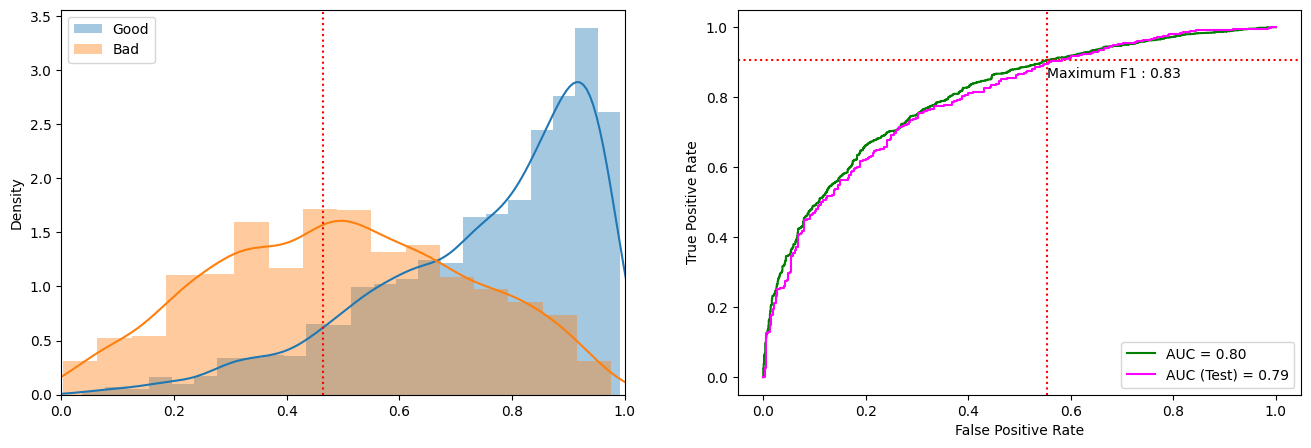

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
# DISTRIBUTION
plot_distributions(logreg, X_train_scaled, y_train, ax=axes[0])
axes[0].axvline(threshold_max, color="red", ls=":")

# ROC CURVE
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score).plot(ax=axes[1],color="green")
axes[1].axvline(fpr[f1_arg_max], color="red", ls=":")
axes[1].axhline(tpr[f1_arg_max], color="red", ls=":")
axes[1].annotate(f"Maximum F1 : {f1_max:.2f}", (fpr[f1_arg_max], tpr[f1_arg_max] - 0.05))

f1_list = get_f1_score_list(logreg, X_train_scaled, y_train, thresholds)

# ROC CURVE Test
y_hat_test = logreg.predict_proba(X_test_scaled)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_test[:, 1], pos_label=1)
auc_score_test = auc(fpr_test, tpr_test)

RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=auc_score_test).plot(ax=axes[1],
                                                                         label=f"AUC (Test) = {auc_score_test:.2}",
                                                                         color="magenta")

Utilizando a base de vinho branco vou utilizar para fazer o modelo de validação cruzada k-folds com k = 10 na regressão logistica.

In [62]:
#reinportando as bibliotecas necessárias, algumas ja temos, outras ainda não. 

# Import necessary packages
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import deepcopy as cp
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.tree import (
    DecisionTreeClassifier, 
    plot_tree
)

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)
from sklearn.svm import SVC

In [66]:
df_tw_wine.rename(columns={'category':'opinion'}, inplace = True)

In [ ]:
from sklearn.model_selection import StratifiedKFold




def interpolation(fpr, tpr):
    interp_fpr = np.linspace(0, 1, 100)
    interp_tpr = np.interp(interp_fpr, fpr, tpr)
    interp_tpr[0] = 0.
    return interp_fpr, interp_tpr

def train_cv(model, cv):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    fprs_list = []
    tprs_list = []
    auc_list  = []
    scaler_list = []
    for fold, (train, val) in enumerate(cv.split(X_train_cv, y_train_cv)):
        X_train = X_train_cv[train, :]
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        scaler_list.append(scaler)
        y_train = y_train_cv[train]
        X_val = X_train_cv[val, :]
        X_val_scaled = scaler.transform(X_val)
        y_val = y_train_cv[val]

        model.fit(X_train_scaled, y_train)

        viz = RocCurveDisplay.from_estimator(
            model,
            X_val_scaled,
            y_val,
            ax = ax,
            alpha=0.3,
            lw=1
        )
        interp_fpr, interp_tpr = interpolation(viz.fpr, viz.tpr)
        fprs_list.append(interp_fpr)
        tprs_list.append(interp_tpr)
        auc_list.append(viz.roc_auc) 

    mean_fpr = np.mean(fprs_list, axis=0)
    mean_tpr = np.mean(tprs_list, axis=0)
    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)

    ax.plot(
        mean_fpr,
        mean_tpr,
        color='blue',
        lw=2,
        label=r"Mean ROC (AUC = %.2f $\pm$ %.2f)" %(mean_auc, std_auc)
    )


    ax.plot(np.linspace(0, 1, 100),
            np.linspace(0, 1, 100),
            color='g',
            ls=":",
            lw=0.5)
    ax.legend()

In [69]:
X = df_tw_wine[var]
y = df_tw_wine['opinion'] 
stratify = y
random_state = 42
test_size = 0.1



In [70]:
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X.values,
                                                          y.values,
                                                          test_size    = 0.1, 
                                                          random_state = 42,
                                                          stratify     = y)

def train(X, y, model_klass, model_kwargs = {}): 
    cv                         = StratifiedKFold(n_splits=10)
    f1_score_val_list          = []
    f1_score_train_list        = []
    accuracy_score_val_list    = []
    accuracy_score_train_list  = []
    recall_score_val_list      = []
    recall_score_train_list    = []
    precision_score_val_list   = []
    precision_score_train_list = []

    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    fprs_list = []
    tprs_list = []
    auc_list  = []

    model_list  = []
    scaler_list = []
    
    # Validação cruzada só em Training Data
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)): 
        X_train = X[train_idx, :]
        y_train = y[train_idx]
        X_val   = X[val_idx, :]
        y_val   = y[val_idx]

        # Escala
        scaler         = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled   = scaler.transform(X_val)

        scaler_list.append(scaler)

        # Treino
        model = model_klass(**model_kwargs)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_train_scaled)

        y_pred_val = model.predict(X_val_scaled)
        print(f"========================= FOLD {fold} ==========================")
        print(f"Meu resultado para treino de F1-Score é {f1_score(y_train, y_pred):.2}, Meu resultado para validação de F1-Score é {f1_score(y_val, y_pred_val):.2}")
        print(f"Meu resultado para treino de  Acurácia é de {accuracy_score(y_train, y_pred):.2}, Meu resultado para validação de Acurácia é de {accuracy_score(y_val, y_pred_val):.2}")
        print(f"Meu resultado para treino de  Recall é de {recall_score(y_train, y_pred):.2}, Meu resultado para validação de Recall é de {recall_score(y_val, y_pred_val):.2}")
        print(f"Meu resultado para treino de  Precision é de {precision_score(y_train, y_pred):.2}, Meu resultado para validação de Precision é de {precision_score(y_val, y_pred_val):.2}")
        f1_score_val_list.append(f1_score(y_val, y_pred_val))
        f1_score_train_list.append(f1_score(y_train, y_pred))
        accuracy_score_val_list.append(accuracy_score(y_val, y_pred_val))
        accuracy_score_train_list.append(accuracy_score(y_train, y_pred))
        recall_score_val_list.append(recall_score(y_val, y_pred_val))
        recall_score_train_list.append(recall_score(y_train, y_pred))
        precision_score_val_list.append(precision_score(y_val, y_pred_val))
        precision_score_train_list.append(precision_score(y_train, y_pred))
        model_list.append(model)
    print()
    mean_val = np.mean(f1_score_val_list)
    std_val  = np.std(f1_score_val_list)
    print(f"Meu resultado de F1-Score Médio de treino é {np.mean(f1_score_train_list): .2} +- {np.std(f1_score_train_list): .2}, Meu resultado de F1-Score Médio de validação é {mean_val: .2} +- {std_val: .2} ")
    print(f"Meu resultado de accuracy_score Médio de treino é {np.mean(accuracy_score_train_list): .2} +- {np.std(accuracy_score_train_list): .2}, Meu resultado de accuracy_score Médio de validação é {np.mean(accuracy_score_val_list): .2} +- {np.std(accuracy_score_val_list): .2} ")
    print(f"Meu resultado de recall_score Médio de treino é {np.mean(recall_score_train_list): .2} +- {np.std(recall_score_train_list): .2}. Meu resultado de recall_score Médio de validação é {np.mean(recall_score_val_list): .2} +- {np.std(recall_score_val_list): .2} ")
    print(f"Meu resultado de precision_score Médio de treino é {np.mean(precision_score_train_list): .2} +- {np.std(precision_score_train_list): .2}, Meu resultado de precision_score Médio de validação é {np.mean(precision_score_val_list): .2} +- {np.std(precision_score_val_list): .2} ")

    best_model_idx = np.argmax(f1_score_val_list)
    print(f"Meu melhor fold é: {best_model_idx} ")
    best_model = model_list[best_model_idx]

    # Fazer a inferência em Test Data
    best_scaler   = scaler_list[best_model_idx]
    X_test_scaled = best_scaler.transform(X_test)
    y_pred_test   = model.predict(X_test_scaled)
    # Fazer a Curva ROC 
    specificity_test_cv = specificity_score(y_test,y_pred_test)
    fpr
    test_fpr = 
    print()
    print(f"""
            Meu resultado de F1-Score para o conjunto de teste é : {f1_score(y_test, y_pred_test):.2}
            Meu resultado de Accuracy para o conjunto de teste é : {accuracy_score(y_test, y_pred_test):.2}
            Meu resultado de Recall para o conjunto de teste é   : {recall_score(y_test, y_pred_test):.2}
            Meu resultado de Precision para o conjunto de teste é: {precision_score(y_test, y_pred_test):.2} """)
    return best_model, mean_val, std_val

In [73]:
# config = [
#     (LogisticRegression, {}),
#     (DecisionTreeClassifier, {'min_samples_leaf': 50}),
#     (SVC, {'kernel': 'rbf', 'gamma': 2}),

# ]

# #results = []
# for model_class, setting in config:
#     print(model_class.__name__)
#     best_model, mean_val, std_val = train(X_train_cv, y_train_cv, model_class, setting)

In [ ]:
tpr = recall
fpr = [(1 - s) for s in specificity]
auc_score = auc(fpr, tpr)

In [ ]:
specificity_test_cv = specificity_score(y_test,y_pred_test)
specificity_test_cv